In [79]:
import matplotlib.pyplot as plt
import numpy as np
import string
import torch

content = ""
with open("../code/names.txt") as file:
    content = file.read()
names = content.split("\n")


stoi = {c:i for i, c in enumerate(string.ascii_lowercase)}
itos = {c:i for i, c in stoi.items()}

stoi["."] = 26
itos[26] = "."

char_frequency = torch.ones([27,27])

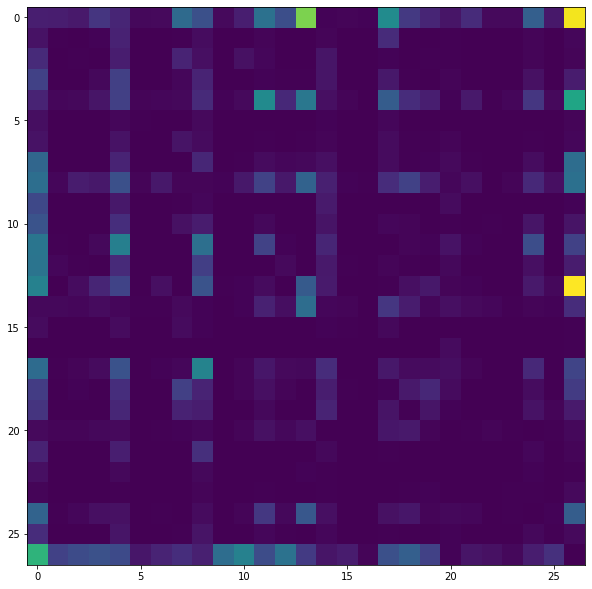

In [80]:
inputs = []
outputs = []

NGRAM_CONFIG = 3

for name in names:
    name = ["."] + list(name) + ["."]
    for c1, c2 in zip(name, name[1:]):
        char_frequency[stoi[c1]][stoi[c2]] += 1

plt.figure(figsize=(10,15))
plt.imshow(char_frequency)

In [81]:
char_frequency = char_frequency / char_frequency.sum(dim=1, keepdim=True)

In [82]:
g = torch.Generator().manual_seed(124578798232)
idx = 0
NO_OF_WORDS = 10
words = []

for i in range(NO_OF_WORDS):
    word = ""
    while True:
        pred_idx = torch.multinomial(char_frequency[idx], num_samples=1, replacement=True, generator=g).item()
        idx = pred_idx
        word += itos[pred_idx]
        if pred_idx == 26:
            words.append(word)
            break
words

['rjai.',
 'jan.',
 'zzipelyraira.',
 'leo.',
 'caynya.',
 'ama.',
 'sluliomrowa.',
 'tisigab.',
 'n.',
 'lieligh.']

In [117]:
# Evaluation : NLL
import math

log_likelihood = 0
n = 0 
for name in names:
    name = ["."] + list(name) + ["."]
    for c1, c2 in zip(name, name[1:]):
        log_likelihood += torch.log(char_frequency[stoi[c1]][stoi[c2]])
        n += 1
neg_log_likelihood = -log_likelihood
neg_log_likelihood = neg_log_likelihood / n
neg_log_likelihood

tensor(2.4544)

In [100]:
# Neural Network implementation

inputs = []
outputs = []

for name in names:
    name = ["."] + list(name) + ["."]
    for c1, c2 in zip(name, name[1:]):
        inputs.append(stoi[c1])
        outputs.append(stoi[c2])

inputs = torch.tensor(inputs)
outputs = torch.tensor(outputs)  

In [108]:
import torch.nn.functional as F
inputs_encoded = F.one_hot(inputs, num_classes=27).float()
W = torch.randn((27,27), requires_grad=True)

In [109]:
weights = inputs_encoded @ W
logits = weights.exp() # Logits -> log counts -> Softmax to mimic probability distribution as output
logits = logits / logits.sum(dim=1, keepdim=True)

In [118]:
# Setup NN learning loop
# Gradient Descent

EPOCHS = 25

for epoch in range(EPOCHS):
    weights = inputs_encoded @ W
    logits = weights.exp() 
    logits = logits / logits.sum(dim=1, keepdim=True)
    
    loss = -logits[torch.arange(len(inputs_encoded)), outputs].log().mean()
    
    # Regularization loss
    loss += (W**2).mean()
    print(loss)
    
    W.grad = None
    
    loss.backward()
    
    W.data += -60 * W.grad

tensor(5.2393, grad_fn=<AddBackward0>)
tensor(4.4162, grad_fn=<AddBackward0>)
tensor(3.8783, grad_fn=<AddBackward0>)
tensor(3.5270, grad_fn=<AddBackward0>)
tensor(3.2992, grad_fn=<AddBackward0>)
tensor(3.1524, grad_fn=<AddBackward0>)
tensor(3.0584, grad_fn=<AddBackward0>)
tensor(2.9984, grad_fn=<AddBackward0>)
tensor(2.9602, grad_fn=<AddBackward0>)
tensor(2.9358, grad_fn=<AddBackward0>)
tensor(2.9202, grad_fn=<AddBackward0>)
tensor(2.9102, grad_fn=<AddBackward0>)
tensor(2.9038, grad_fn=<AddBackward0>)
tensor(2.8997, grad_fn=<AddBackward0>)
tensor(2.8970, grad_fn=<AddBackward0>)
tensor(2.8953, grad_fn=<AddBackward0>)
tensor(2.8942, grad_fn=<AddBackward0>)
tensor(2.8934, grad_fn=<AddBackward0>)
tensor(2.8929, grad_fn=<AddBackward0>)
tensor(2.8926, grad_fn=<AddBackward0>)
tensor(2.8924, grad_fn=<AddBackward0>)
tensor(2.8923, grad_fn=<AddBackward0>)
tensor(2.8922, grad_fn=<AddBackward0>)
tensor(2.8921, grad_fn=<AddBackward0>)
tensor(2.8921, grad_fn=<AddBackward0>)
